# Comparison between BH and SExtractor

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Array of different noise standard deviations ($\sigma_{noise}$) used on dataset

In [10]:
sigma_noise = np.array([[0.0, 5.0, 14.0, 18.0, 26.0]])

### Accuracy for BH (Top and after Fine Tuning)

In [23]:
#Results retireved from 2 trainings on 80 0000 images (50% blended and 50% not blended) each time.
#Train-valid-test split = 0.45, 0.45, 0.1
#Perhaps a mean of the accuracy on several runs might be more accurate

bh_top = np.array([[0.970125, 0.95675, 0.917, 0.894125, 0.826875 ]])

bh_fine = np.array([[0.9645, 0.959125, 0.910375,0.899125, 0.839125 ]])

### Accuracy for SExtractor 

In [12]:
#Accuracy retrieved from running SExtractor on 40 000 blended images
s_ext = np.array([[0.8924, 0.8929, 0.8889, 0.8831, 0.7988 ]])

missed_blends = np.array([[0.1076, 0.1111, 0.1070, 0.1165, 0.1986]])

### Plot

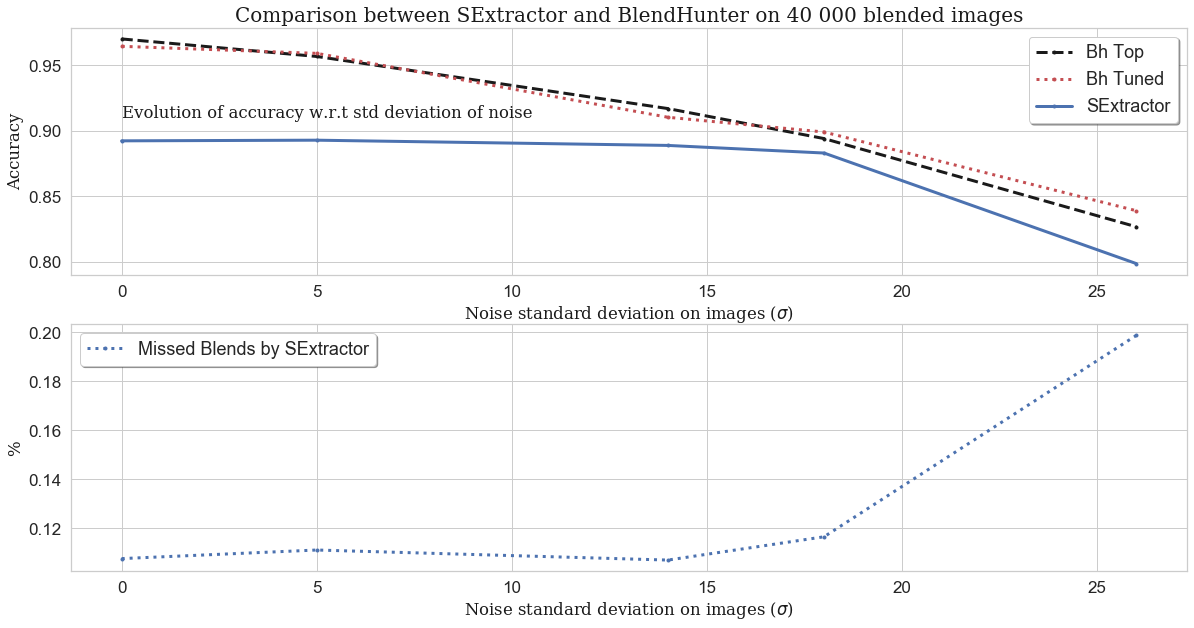

In [22]:
sns.set(context='notebook', style='whitegrid', palette='deep')

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16.5}

fig, ax = plt.subplots(2,figsize=(20,10), sharey='row')

#First subplot (Accuracy w.r.t. sigma_noise)
ax[0].set_title('Comparison between SExtractor and BlendHunter on 40 000 blended images', fontdict=font, fontsize=20)
ax[0].plot(sigma_noise[0], bh_top[0], 'k--',marker='.', linewidth=3, label='Bh Top')
ax[0].plot(sigma_noise[0], bh_fine[0], 'r:', marker = '.',linewidth=3, label='Bh Tuned')
ax[0].plot(sigma_noise[0], s_ext[0], 'b', marker ='.', linewidth=3, label='SExtractor')
ax[0].legend(loc='upper right', shadow=True, fontsize=18)
ax[0].set_ylabel('Accuracy', fontdict = font)
ax[0].set_xlabel('Noise standard deviation on images ($\sigma$)', fontdict = font)
ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[0].text(0.001, 0.91, 'Evolution of accuracy w.r.t std deviation of noise', fontdict=font)

#Second subplot (Missed blends by SExtractor and BH's false negatives in a future commit)
ax[1].plot(sigma_noise[0], missed_blends[0], 'b:', marker = '.', linewidth=3, label='Missed Blends by SExtractor')
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[1].legend(loc='upper left', shadow=True, fontsize=18)
ax[1].set_ylabel('%', fontdict=font)


plt.xlabel('Noise standard deviation on images ($\sigma$)', fontdict=font)
plt.show()